<a href="https://colab.research.google.com/github/AlexTitu/plenopticam-lytro-illum/blob/main/Inria_Dataset_Plenopticam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Camera Plenoptica Lytro Illum

Pașii parcurși în notebook-ul ce prezintă biblioteca PlenotiCam:

1. Descărcarea setului de imagini și definirea parametrilor necesari calibrării funcției de citire a imaginilor plenoptice.
2. Citirea și decodarea imaginii captate de către camera Illum
3. Regăsirea imaginii albe de calibrare
4. Regăsirea centroizilor microimaginii
5. Alinierea microimaginii - microimaginile camerei lytro ordonate hexagonal sunt rearanjate dreptunghiular rezultand o rezolutie consistenta
6. Extragerea diferitelor perspective (Sub-Aperture images) din imaginea cu camp de lumină.
7. Afișarea imaginii de sub-apertură centrale, a tuturor imaginilor, animație pentru diferitele plane focale și a diferitelor puncte de vedere (viewpoints)
*8. Extragerea adâncimilor din imaginea în câmp de lumină (depth from defocus)


In [ ]:
import sys
print('Python v'+sys.version+'\n')

try:
    import plenopticam as pcam
except ImportError:
    !pip install 'plenopticam>=0.7.0'
    import plenopticam as pcam
print('PlenoptiCam v'+pcam.__version__+'\n')

try:
    import matplotlib.pyplot as plt
except:
    !pip install matplotlib --upgrade
    import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML

%matplotlib inline

Python v3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.4/399.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.6/180.6 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 339.2/339.2 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.8 MB/s eta 0:00:00
  Attempting uninstall: tifffile
    Found existing installation: tifffile 2024.5.10
    Uninstalling tifffile-2024.5.10:
      Successfully uninstalled tifffile-2024.5.10
PlenoptiCam v0.9.3



/usr/local/lib/python3.10/dist-packages/colour/utilities/verbose.py:265: ColourWarning: "vaab/colour" was detected in "sys.path", please define a "COLOUR_SCIENCE__COLOUR__IMPORT_VAAB_COLOUR=True" environment variable to import its objects into "colour" namespace!
  warn(*args, **kwargs)  # noqa: B028


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd drive/MyDrive/inria/

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1GBgZFsK499mZD2CILAML4odaFGBmh9Io/inria


In [ ]:
# instantiate config object and set image file paths and options
cfg = pcam.cfg.PlenopticamConfig()
cfg.default_values()
cfg.params[cfg.lfp_path] = './MessyDesk.LFR'
cfg.params[cfg.cal_path] = './caldata-B5144000580.tar'
cfg.params[cfg.opt_cali] = True
cfg.params[cfg.ptc_leng] = 13 # ?
cfg.params[cfg.cal_meth] = pcam.cfg.constants.CALI_METH[2]

# instantiate status object for progress
sta = pcam.misc.PlenopticamStatus()

In [ ]:
reader = pcam.lfp_reader.LfpReader(cfg, sta)
reader.main()
lfp_img = reader.lfp_img

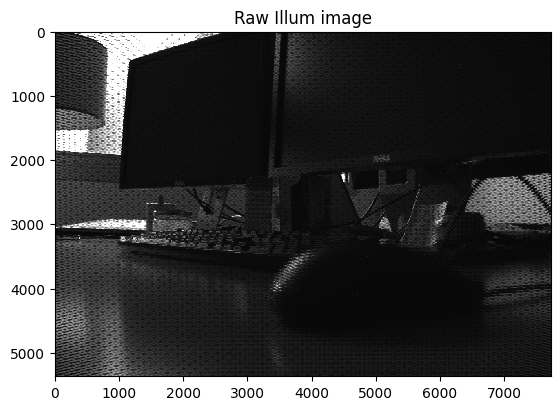

In [ ]:
plt.figure()
plt.imshow(lfp_img, cmap='gray', interpolation='none')
plt.grid(False)
plt.title('Raw Illum image')
plt.show()

In [ ]:
cal_finder = pcam.lfp_calibrator.CaliFinder(cfg, sta)
ret = cal_finder.main()
wht_img = cal_finder.wht_bay

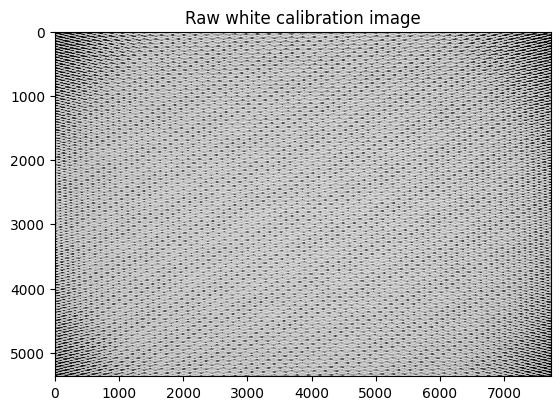

In [ ]:
plt.figure()
plt.imshow(wht_img, cmap='gray', interpolation='none')
plt.grid(False)
plt.title('Raw white calibration image')
plt.show()

In [ ]:
cal_obj = pcam.lfp_calibrator.LfpCalibrator(wht_img, cfg, sta)
ret = cal_obj.main()
cfg = cal_obj.cfg


 Debayering
 Progress: Finished 


 Estimate micro image size
 Progress: Finished 


 Compute LoG
 Progress: Finished 


 Select maxima
 Progress: Finished 


 Refine micro image centers
 Progress: Finished 


 Sort micro image centers
 Progress: Finished 


 Grid fitting
 Progress: Finished 


 Save calibration data
 Progress: Finished 



<ipython-input-9-26976ff32c14>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i, j].set_yticklabels([str(k), str(k+hp//2), str(k+hp)])
<ipython-input-9-26976ff32c14>:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i, j].set_yticklabels([str(k), str(k+hp//2), str(k+hp)])
<ipython-input-9-26976ff32c14>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i, j].set_xticklabels([str(l), str(l+wp//2), str(l+wp)])
<ipython-input-9-26976ff32c14>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i, j].set_xticklabels([str(l), str(l+wp//2), str(l+wp)])
<ipython-input-9-26976ff32c14>:61: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


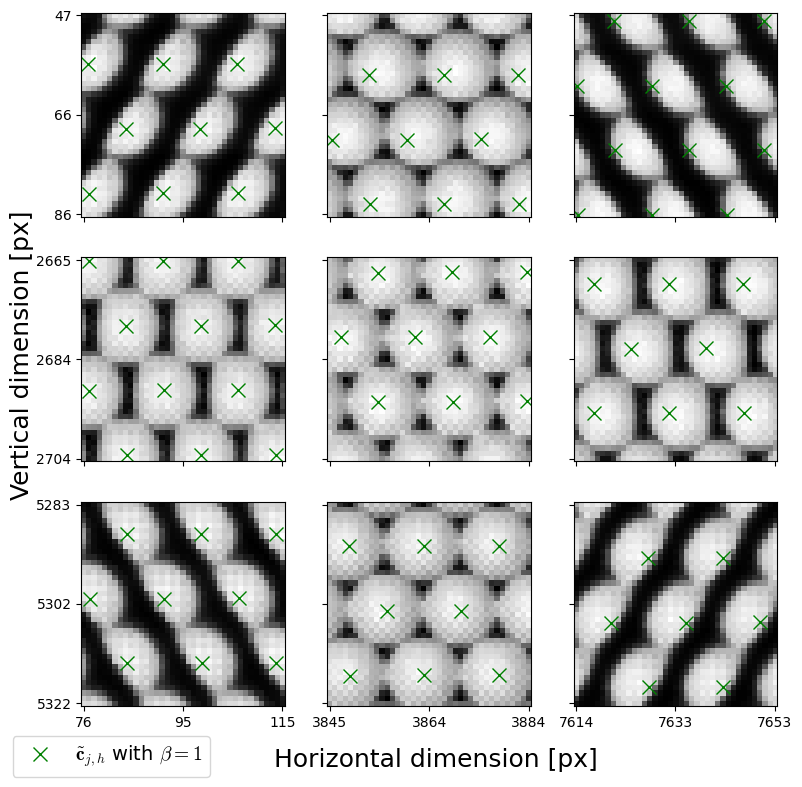

In [ ]:
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['pdf.fonttype'] = 42

y_coords = [row[0] for row in cfg.calibs[cfg.mic_list]]
x_coords = [row[1] for row in cfg.calibs[cfg.mic_list]]

s = 3
h, w, c = wht_img.shape if len(wht_img.shape) == 3 else wht_img.shape + (1,)
hp, wp = [39]*2
fig, axs = plt.subplots(s, s, facecolor='w', edgecolor='k', figsize=(9, 9))
markers = ['r.', 'b+', 'gx']
labels = [r'$\bar{\mathbf{c}}_{j,h}$',
          r'$\tilde{\mathbf{c}}_{j,h}$ with $\beta=0$',
          r'$\tilde{\mathbf{c}}_{j,h}$ with $\beta=1$']
m = 2

for i in range(s):
    for j in range(s):
        # plot cropped image part
        k = h//2 + (i-s//2) * int(h/2.05) - hp // 2
        l = w//2 + (j-s//2) * int(w/2.05) - wp // 2
        axs[i, j].imshow(wht_img[k:k+hp, l:l+wp, ...], cmap='gray')

        # plot centroids in cropped area
        coords_crop = [(y, x) for y, x in zip(y_coords, x_coords)
                       if k <= y <= k+hp-.5 and l <= x <= l+wp-.5]
        y_centroids = [row[0] - k for row in coords_crop]
        x_centroids = [row[1] - l for row in coords_crop]
        axs[i, j].plot(x_centroids, y_centroids, markers[m],
                       markersize=10, label=labels[m])
        axs[i, j].grid(False)

        if j == 0 or i == s-1:
            if j == 0 and i == s-1:
                axs[i, j].tick_params(top=False, bottom=True, left=True, right=False,
                                      labelleft=True, labelbottom=True)
                axs[i, j].set_yticklabels([str(k), str(k+hp//2), str(k+hp)])
                axs[i, j].set_xticklabels([str(l), str(l+wp//2), str(l+wp)])
            elif j == 0:
                axs[i, j].tick_params(top=False, bottom=True, left=True, right=False,
                                      labelleft=True, labelbottom=False)
                axs[i, j].set_yticklabels([str(k), str(k+hp//2), str(k+hp)])
            elif i == s-1:
                axs[i, j].tick_params(top=False, bottom=True, left=True, right=False,
                                      labelleft=False, labelbottom=True)
                axs[i, j].set_xticklabels([str(l), str(l+wp//2), str(l+wp)])

        else:
            axs[i, j].tick_params(top=False, bottom=True, left=True, right=False,
                                  labelleft=False, labelbottom=False)

        axs[i, j].set_yticks(range(0, hp+1, hp//2))
        axs[i, j].set_xticks(range(0, wp+1, wp//2))

plt.legend(loc='upper left', bbox_to_anchor=(-2.8, -.1), fancybox=True, fontsize=14)
# set common labels
fig.text(0.52, 0.05, 'Horizontal dimension [px]', ha='center', va='center', fontsize=18)
fig.text(0.06, 0.5, 'Vertical dimension [px]', ha='center', va='center', rotation='vertical', fontsize=18)

fig.tight_layout()
plt.savefig('centroid_LMA_fits+regular_div.pdf', bbox_inches="tight")
plt.show()

In [ ]:
ret = cfg.load_cal_data()
aligner = pcam.lfp_aligner.LfpAligner(lfp_img, cfg, sta, wht_img)
ret = aligner.main()
lfp_img_align = aligner.lfp_img


 Hot pixel detection
 Progress: Finished 


 Estimate white image noise level
 Progress: Finished 


 De-vignetting
 Progress: Finished 


 Debayering
 Progress: Finished 


 Light-field alignment
 Progress: 100%
 Save aligned light-field

 Potential data loss as directory already exists.
 Progress: Finished 



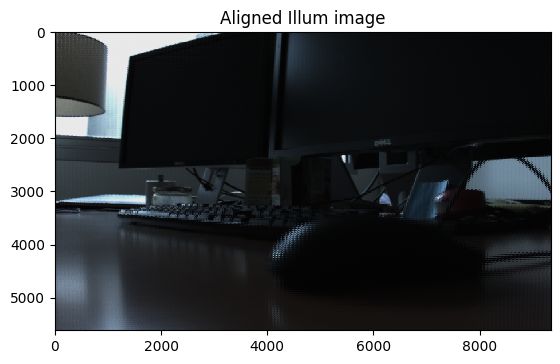

In [ ]:
from os.path import join, basename
import pickle

with open(join(cfg.exp_path, 'lfp_img_align.pkl'), 'rb') as f:
    lfp_img_align = pickle.load(f)

plt.figure()
plt.imshow(lfp_img_align/lfp_img_align.max(), interpolation='none')
plt.grid(False)
plt.title('Aligned Illum image')
plt.show()

try:
    from plenopticam.lfp_reader import LfpDecoder
    # try to load json file (if present)
    json_dict = cfg.load_json(cfg.exp_path, basename(cfg.exp_path)+'.json')
    cfg.lfpimg = LfpDecoder.filter_lfp_json(json_dict, cfg.lfpimg)
except FileNotFoundError:
    pass

In [ ]:
extractor = pcam.lfp_extractor.LfpExtractor(lfp_img_align, cfg, sta)
ret = extractor.main()
vp_img_arr = extractor.vp_img_arr


 Render angular domain
 Progress: Finished 


 Viewpoint composition
 Progress: Finished 


 Color equalization
 Progress: Finished 


 Write viewpoint images
 Progress: Finished 


 Compute depth map
 Progress: Finished 


 Write depth data
 Progress: Finished 



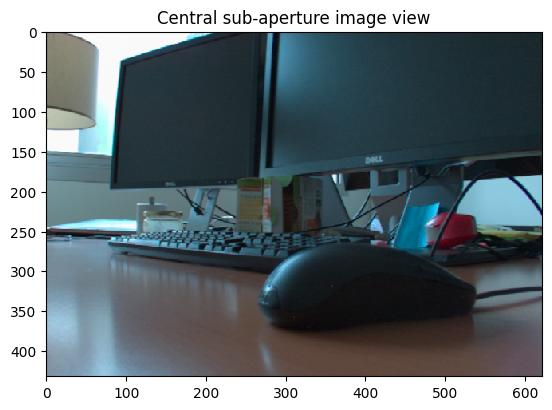

In [ ]:
view_obj = pcam.lfp_extractor.LfpViewpoints(vp_img_arr=vp_img_arr)
vp_view = view_obj.central_view

plt.figure()
plt.imshow(vp_view/vp_view.max(), interpolation='none')
plt.grid(False)
plt.title('Central sub-aperture image view')
plt.show()

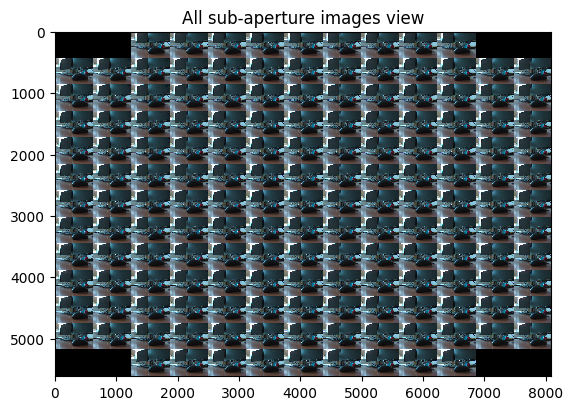

In [ ]:
view_obj = pcam.lfp_extractor.LfpViewpoints(vp_img_arr=vp_img_arr)
vp_stack = view_obj.views_stacked_img

plt.figure()
plt.imshow(vp_stack/vp_stack.max(), interpolation='none')
plt.grid(False)
plt.title('All sub-aperture images view')
plt.show()

In [ ]:
# set refocus range $a$
cfg.params[cfg.ran_refo] = [-1, 5]
cfg.params[cfg.opt_prnt] = False
# use non-gamma corrected viewpoint array
refocuser = pcam.lfp_refocuser.LfpRefocuser(vp_img_arr=extractor.vp_img_linear, cfg=cfg)
refocuser.main()
refo_stack = refocuser.refo_stack

fig, ax = plt.subplots()
ax.set_title('Refocusing animation')
l = ax.imshow(refo_stack[0])
animate = lambda i: l.set_data(refo_stack[i])
anim = animation.FuncAnimation(fig, animate, frames=len(refo_stack), interval=1000)
plt.close() # get rid of initial figure

HTML(anim.to_jshtml())
anim.save('./animation_focus.gif', writer='imagemagick', fps=1)

In [ ]:
view_obj = pcam.lfp_extractor.LfpViewpoints(vp_img_arr=vp_img_arr)
vp_arr = view_obj.reorder_vp_arr(pattern='circle', lf_radius=5)

fig, ax = plt.subplots()
ax.set_title('View animation')
l = ax.imshow(vp_arr[0])
animate = lambda i: l.set_data(vp_arr[i])
anim = animation.FuncAnimation(fig, animate, frames=len(vp_arr), interval=50)
plt.close() # get rid of initial figure

HTML(anim.to_jshtml())
anim.save('./animation_view.gif', writer='imagemagick', fps=15)

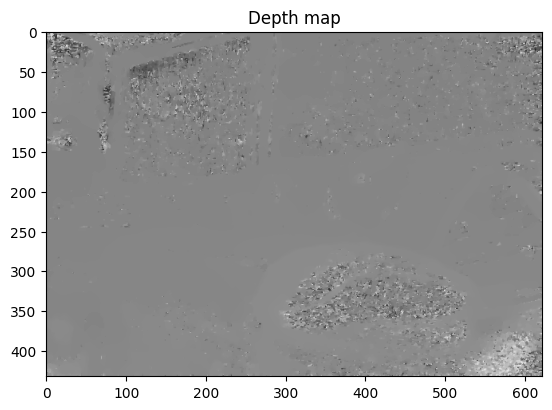

In [ ]:
# compute and write depth data from epipolar analysis
if cfg.params[cfg.opt_dpth]:
    obj = pcam.lfp_extractor.LfpDepth(vp_img_arr=vp_img_arr, cfg=cfg, sta=sta)
    obj.main()
    depth_map = obj.depth_map

# plot depth map in 2-D
fig, ax = plt.subplots()
ax.set_title('Depth map')
ax.imshow(depth_map, cmap='gray')
plt.show()

# plot depth map in 3-D
fig, ax = plt.figure(figsize=(5, 5)), plt.axes(projection='3d')
ax.set_facecolor('#ffffff') #148ec8
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = obj.plot_point_cloud(rgb_img=vp_view, down_scale=2, ax=ax)
plt.close() # get rid of initial figure
animate = lambda i: ax.view_init(60, 60+i*20)
anim = animation.FuncAnimation(fig, animate, frames=18, interval=100, repeat=True)
HTML(anim.to_jshtml())

In [ ]:
try:
    anim.save('depth_anim.gif', writer='imagemagick', fps=10)
except TypeError:
    anim.save('depth_anim.gif', writer='pillow', fps=10)